# Project 3a: Hough Transform 

The purpose of this project is to acquaint you with the fundamental techniques behind two fundamental feature detection algorithms in Computer Vision: the Hough Transform and the Canny Filter.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
from utils import load_image
from project3 import *

# Part 1: Sobel Edge Detector


Congratulations!  You've unlocked the cv2.filter2d() method, which will replace the (non-linearly separable) filtering algorithms you created in Project 2.

Use it to implement a Sobel Edge detector.  As described in the textbook, the Sobel kernel finds oriented edges.    The kernel for finding vertical edges is:

$$ G_{x} = \begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}$$

and the kernel for finding horizontal edges is:

$$ G_{y} = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ +1 & +2 & +1 \end{bmatrix}$$

Using filter2d, run each of these kernels separately over some greyscale images, and show the results below.   How are the x and y gradients different?

Hint: I recommend *first* running a slight gaussian blur over an image to remove the worst high frequency noise.




Text(0.5,1,'Horizontal Edge Detection')

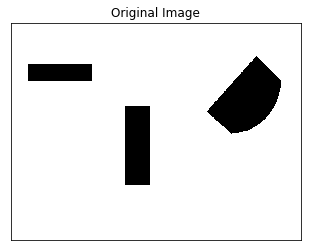

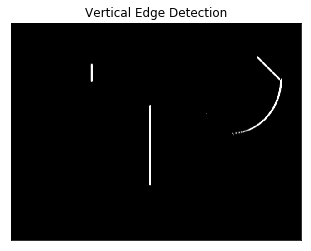

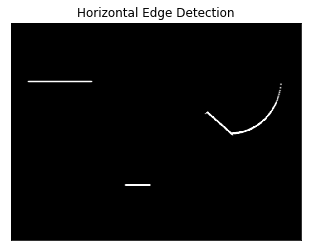

In [2]:
#TESTING CODE HERE

# Edge Detecting Filters
Gx = np.array([-1,0,1,-2,0,2,-1,0,1]).reshape(3,3)
Gy = np.array([-1,-2,-1,0,0,0,1,2,1]).reshape(3,3)

# Small Blur Filter
blur_filter = np.ones((3, 3))
blur_filter /= np.sum(blur_filter)  # making the filter sum to 1

# Testing Edge Detectors
plt.figure()
img = np.array(load_image('../project3/images/testimage.pgm'))
plt.imshow(img)
plt.xticks([]), plt.yticks([]) 
plt.title('Original Image')

# Applying Small Blur
blurred = cv2.GaussianBlur(img,(5,5),0)

# Plotting Edge Detection
plt.figure()
vert_edge = cv2.filter2D(blurred, -1, Gx)
plt.imshow(vert_edge)
plt.xticks([]), plt.yticks([])
plt.title('Vertical Edge Detection')

plt.figure()
horiz_edge = cv2.filter2D(blurred, -1, Gy)
plt.imshow(horiz_edge)
plt.xticks([]), plt.yticks([]) 
plt.title('Horizontal Edge Detection')



Of course, we're really presently only interested in the magnitude, not the orientation of edges (although that'll change soon), so we can use the following formula:

$G = \sqrt{G_{x}^{2} + G_{y}^{2}}$

In the cell below, show results of calculating the edge magnitude of the images you tested above

Text(0.5,1,'Magnitude Edge Detection')

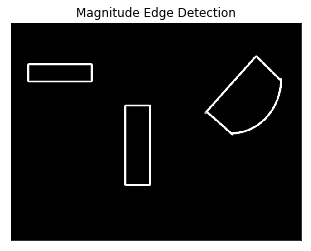

In [3]:
# Magnitude Edge Detection
mag = np.sqrt(np.square(vert_edge) + np.square(horiz_edge))
plt.imshow(mag)
plt.xticks([]), plt.yticks([])
plt.title('Magnitude Edge Detection')

# Part 2: Hough Transform

Following Tuesday's lecture, recall that the Hough Transform is a way to find the predominant lines in an image (generally, a de-noised and edge-detected image).  It all revolves around using the equation:

$\rho = x*cos(\theta) + y*sin(\theta)$

to define a line.

Let's begin by "discretizing" our $\theta$ (angle) values into ten discrete values:


In [4]:
thetaVals = np.linspace(0,math.pi,9) #8 vals between 0 and pi

Then we can define a bunch of arbitrary points:

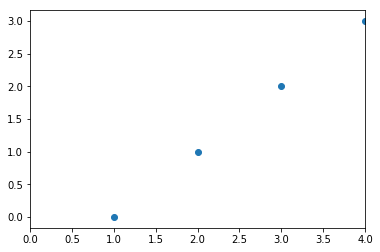

In [5]:
pt0 = (1,0)
pt1 = (2,1)
pt2 = (3,2)
pt3 = (4,3)
pts = [pt0,pt1,pt2,pt3]

xs = [p[0] for p in pts]
ys = [p[1] for p in pts]

plt.xlim(0,4)
plt.scatter(xs,ys)


Here's what we get for sweeping through the theta values described above, and finding each corresponding $\rho$ value:

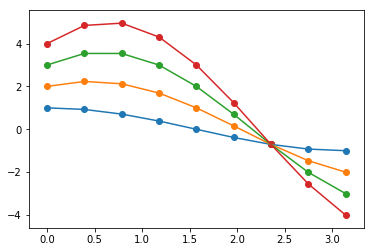

In [6]:
rhoVals = []
for p in pts:
    rhoVals = []
    for t in thetaVals:
        rhoVals.append(p[0]*math.cos(t) + p[1]*math.sin(t))
        
    plot = plt.plot(thetaVals,rhoVals) 
    plot = plt.scatter(thetaVals,rhoVals)    

Notice that each point's $\rho$ values form a sinusoidal shape, and that all the shapes intersect at 3/4*$\pi$ (that is, 135 degrees).   What $\rho$ value do they intersect at?

Let's try a different set of points:

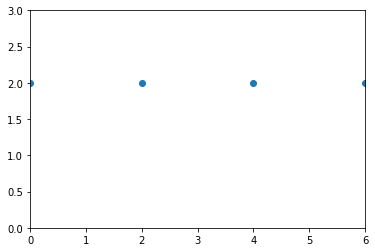

In [7]:
pt0 = (0,2)
pt1 = (2,2)
pt2 = (4,2)
pt3 = (6,2)
pts = [pt0,pt1,pt2,pt3]

xs = [p[0] for p in pts]
ys = [p[1] for p in pts]

plt.xlim(0,6)
plt.ylim(0,3)
plt.scatter(xs,ys)

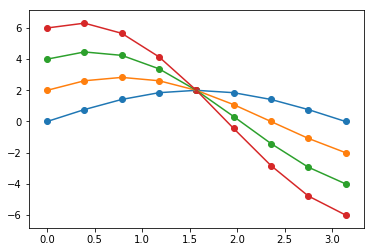

In [8]:

rhoVals = []
for p in pts:
    rhoVals = []
    for t in thetaVals:
        rhoVals.append(p[0]*math.cos(t) + p[1]*math.sin(t))
    plot = plt.plot(thetaVals,rhoVals) 
    plot = plt.scatter(thetaVals,rhoVals)


--- 
And this is what it looks like whe nwe have *two dominant lines in an image.

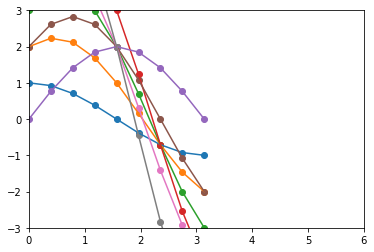

In [9]:
pt0 = (1,0)
pt1 = (2,1)
pt2 = (3,2)
pt3 = (4,3)
pt10 = (0,2)
pt11 = (2,2)
pt12 = (4,2)
pt13 = (6,2)
pts = [pt0,pt1,pt2,pt3,pt10,pt11,pt12,pt13]

plt.xlim(0,6)
plt.ylim(-3,3)
#plt.scatter(xs,ys)


rhoVals = []
for p in pts:
    rhoVals = []
    for t in thetaVals:
        rhoVals.append(p[0]*math.cos(t) + p[1]*math.sin(t))
    #print(rhoVals)
    plot = plt.plot(thetaVals,rhoVals) 
    plot = plt.scatter(thetaVals,rhoVals) 

## Part 1: The Hough Transform

Now that you understand how the Hough Transform works, try to replicate (by hand) the OpenCV Hough Transform function using an function signature.

The Hough Transform, as covered in class, is an algorithm where each non-zero pixel in an image (typically an edge-detected, thresholded image) "votes" for every line in might belong to.  In the above examples, we've discretized the angles that our lines could belong to into eight possible $\theta$ values, and then calculated $\rho$ for each point for each theta value.  In both examples above, all for points agree they belong to the same line.  

The Hough Transform, then, takes in a set of points, and returns a set of lines.  Following the [openCV API]( https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=houghlines), the Hough transform method should take the following form: 

lines = cv2.HoughLines(image, rho, theta, threshold)

That is, it should return an output vector of lines whose "votes" exceed the provided vote threshold.  Each line is represented by a two-element vector ($\rho$, $\theta$). Read the API to understand the units of the rho and theta arguments.






[0.         0.22439948 0.44879895 0.67319843 0.8975979  1.12199738
 1.34639685 1.57079633]


Text(0.5,1,'Thresholded Image')

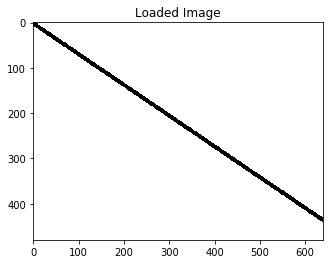

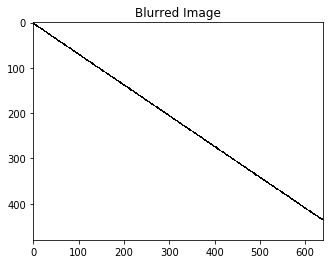

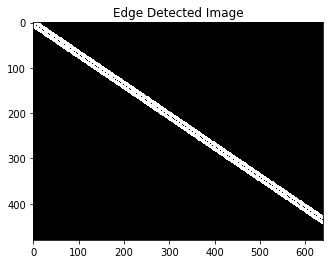

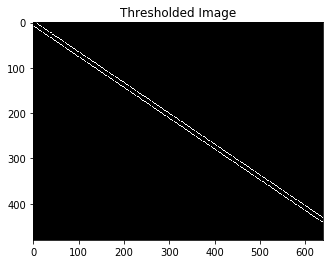

In [10]:
stripe = np.float32(np.array(cv2.imread('../project3/images/stripe.pgm')))
plt.figure()
plt.imshow(stripe)
plt.title('Loaded Image')

blurred = cv2.GaussianBlur(stripe,(5,5),0)
plt.figure()
plt.imshow(blurred)
plt.title('Blurred Image')

vert_edge = cv2.filter2D(blurred, -1, Gx)
horiz_edge = cv2.filter2D(blurred, -1, Gy)
mag = np.sqrt(np.square(vert_edge) + np.square(horiz_edge))

plt.figure()
plt.imshow(mag)
plt.title('Edge Detected Image')

plt.figure()
thresh = sobelThreshold(mag, 500)
plt.imshow(thresh)
lines = myHoughLines(thresh,1,math.pi/2,10)
plt.title('Thresholded Image')

[0.         0.22439948 0.44879895 0.67319843 0.8975979  1.12199738
 1.34639685 1.57079633]


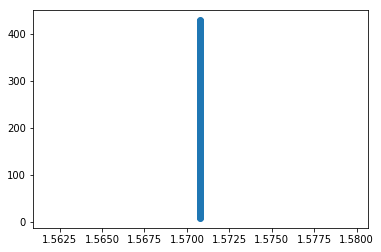

In [11]:
lines = myHoughLines(thresh, 1, math.pi/2, 5)
t = [i[0] for i in lines]
r = [i[1] for i in lines]
plt.scatter(t,r)
plt.show()

# Writeup

There were a few different decisions I considered in order to 
implement the Hough Transform and the Canny Edge Detector. The first of which 
was in writing Canny, where I first needed to find the magnitude G after Gx and Gy
were found. As the Opencv function filter2D initially clips unsigned 8 bit values that are not
in a positive range of either [0..1] or [0..255], this would conflict with finding the correct
magnitude of the gradient of the image as I would need to also consider the negative gradient values.
To avoid this conflict, I first converted the image into 64 bit floating values before finding the directional
gradient values. I also used the floating point values for comparing magnitudes in the non-maximum suppression and double threshold functions. However, because I discretized the pixel values into either strong or weak in the edge tracking function, I reverted the image back to 8 bit unsigned integer values . The next concern was that the origin for an image is not the bottom left. As it is in the top left, each y is negative when compared to when the origin at the bottom left. To make it such that each angle would be correct for non-maximum suppression, I made each theta = 180 - theta_original. 

For the Hough Transfom, I counted votes for each (rho, theta) point by storing each unique pair as a key in a dictionary. Every time a pair was voted on, the value for the key was increased by 1. Then, after all the (rho, theta) pairs were calculated, I iterated through the dictionary and returned a list of all the (rho,theta) pairs that had more votes than the threshold.